In [82]:
import pandas as pd
from scipy.stats import ttest_1samp , ttest_rel, ttest_ind,f_oneway
import plotly.express as px
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [7]:
# seu código 
ideb = pd.read_csv('ideb.csv',usecols=['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa' , 'ideb'])
ideb.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.8,2.4
1,2005,AC,53.9,167.8,165.6,2.3


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [8]:
# seu código
ideb.shape

(130194, 6)

In [14]:
# seu código
ideb.isna().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [28]:
nc = 0.95
ns = 1 - nc
print(ns)

0.050000000000000044


In [22]:
ideb_2005 = ideb[ideb.ano==2005]

In [24]:
ideb_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14466 entries, 0 to 128817
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          14466 non-null  int64  
 1   sigla_uf                     14466 non-null  object 
 2   taxa_aprovacao               12083 non-null  float64
 3   nota_saeb_matematica         12083 non-null  float64
 4   nota_saeb_lingua_portuguesa  12083 non-null  float64
 5   ideb                         12083 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 791.1+ KB


In [50]:
# seu código
ttest_1samp(a=ideb_2005.dropna()['taxa_aprovacao'], popmean=78, alternative='two-sided')

Ttest_1sampResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95)

In [32]:
# Hipotese
#H0: x=xa
#H1: x≠xa


# A gente rejeita o H0 pois pvalue (3.147e-95) é menor que a significância(0,05)
# Ou seja, a média não é igual a 78

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [ ]:
# H0: xRS = xCE
# H1: xRS ≠ xCE

In [37]:
# seu código
ideb_2019 = ideb[ideb.ano==2019]
ideb_2019.dropna(inplace=True)
ideb_2019.head(2)

C:\Users\leolk\AppData\Local\Temp\ipykernel_4600\3780406932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideb_2019.dropna(inplace=True)


,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
3409,2019,AC,98.2,288.92,263.10,8.1
3410,2019,AL,99.6,306.95,281.26,8.9


In [39]:
ttest_ind(ideb_2019['ideb'][ideb_2019.sigla_uf == 'RS'],
            ideb_2019['ideb'][ideb_2019.sigla_uf == 'CE'])

Ttest_indResult(statistic=-4.3200508719663135, pvalue=1.6632800256873896e-05)

In [40]:
# A gente rejeita o H0 pois pvalue (1.66e-05) é menor que a significância(0,05)
# Ou seja, a média de RS não é igual a média de CE

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

In [41]:
# seu código
fig = px.box(ideb_2019[ideb_2019.sigla_uf.isin(['RS','CE'])], x="sigla_uf", y="ideb")
fig.show()

In [45]:
ideb_2019_RSCE = ideb_2019[ideb_2019.sigla_uf.isin(['RS','CE'])]

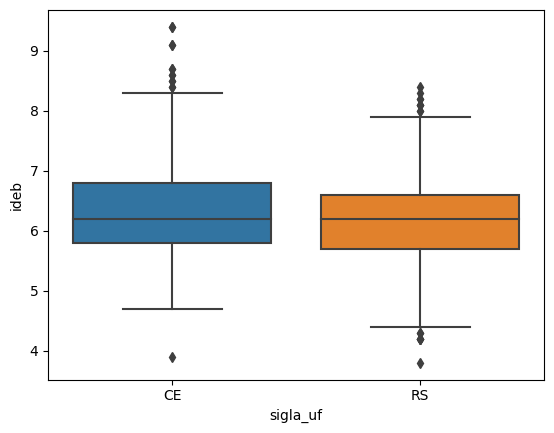

In [51]:
import seaborn as banana # COLOCAR sns e não banana
banana.boxplot(x=ideb_2019_RSCE.sigla_uf
               , y=ideb_2019_RSCE.ideb);

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [ ]:
# H0: x2005 = x2019
# H1: x2005 ≠ x2019

In [56]:
# Remover Linhas Nulas
ideb_2005.dropna(inplace=True)
ideb_2019.dropna(inplace=True)

C:\Users\leolk\AppData\Local\Temp\ipykernel_4600\1358592966.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\leolk\AppData\Local\Temp\ipykernel_4600\1358592966.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
ideb_2005_300 = ideb_2005.head(300)
ideb_2019_300 = ideb_2019.head(300)

In [63]:
# seu código
ttest_rel(ideb_2005_300['ideb'],
            ideb_2019_300['ideb'])

Ttest_relResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295)

In [ ]:
# A gente rejeita o H0 pois pvalue (8.33e-295) é menor que a significância(0.05)
# Ou seja, a média de 2005 não é igual a média de 2019

### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

In [67]:
df = pd.concat([ideb_2005_300,ideb_2019_300])
df.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.8,2.4
1,2005,AC,53.9,167.8,165.6,2.3


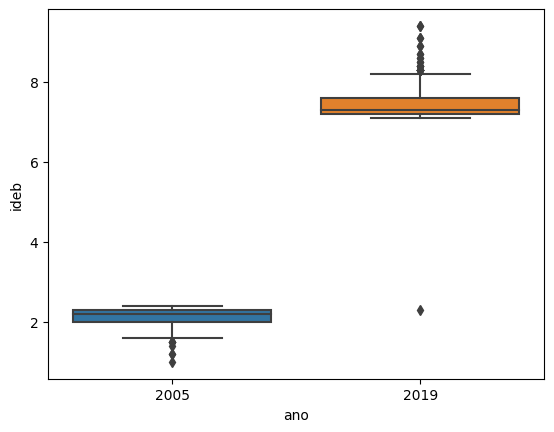

In [68]:
# seu código
import seaborn as sns
sns.boxplot(x=df.ano
               , y=df.ideb);

In [ ]:
# Podemos observar que os gráficos possuem um diferença de distribuição de valores
# do IDEB bem diferentes. Aonde suas medianas estão bem distanciadas.

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [77]:
# seu código
ideb_2019_RS = ideb_2019[ideb_2019.sigla_uf=='RS']
ideb_2019_PR = ideb_2019[ideb_2019.sigla_uf=='PR']
ideb_2019_SC = ideb_2019[ideb_2019.sigla_uf=='SC']
#ideb_2019_3sul.sigla_uf.value_counts()

In [79]:
# seu código
f_oneway(ideb_2019_RS.ideb,
         ideb_2019_PR.ideb,
         ideb_2019_SC.ideb)

F_onewayResult(statistic=27.712354138245196, pvalue=1.233158928425478e-12)

In [ ]:
# A gente rejeita o H0 pois pvalue (1.23e-12) é menor que a significância(0.05)
# Ou seja, a média de RS não é igual a média de PRque também não é 
# igual a média de SC

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

In [88]:
# seu código
df = pd.concat([ideb_2019_PR,ideb_2019_SC,ideb_2019_RS])
df.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
3714,2019,PR,99.9,267.92,249.36,7.6
3715,2019,PR,99.9,267.92,249.36,7.6


<AxesSubplot: xlabel='sigla_uf', ylabel='ideb'>

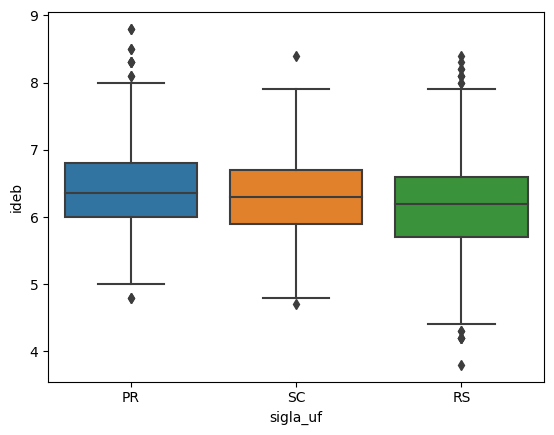

In [89]:
sns.boxplot(x=df.sigla_uf,y=df.ideb)

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [91]:
# seu código
print(pairwise_tukeyhsd(endog = df.ideb,
                  groups = df.sigla_uf,
                  alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------
